In [1]:
import pandas as pd

df = pd.read_csv("C:/movie-recommender-agent/data/raw/movies.csv")

df.head()  # Affiche les 5 premières lignes
df.info()  # Info sur les colonnes et types
df.describe()  # Statistiques sur les colonnes numériques


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330511 entries, 0 to 1330510
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1330511 non-null  int64  
 1   title                 1330494 non-null  object 
 2   vote_average          1330511 non-null  float64
 3   vote_count            1330511 non-null  int64  
 4   status                1330511 non-null  object 
 5   release_date          1058468 non-null  object 
 6   revenue               1330511 non-null  int64  
 7   runtime               1330511 non-null  int64  
 8   adult                 1330511 non-null  bool   
 9   backdrop_path         337380 non-null   object 
 10  budget                1330511 non-null  int64  
 11  homepage              138007 non-null   object 
 12  imdb_id               648135 non-null   object 
 13  original_language     1330511 non-null  object 
 14  original_title        1330494 non-

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.330511e+06,1.330511e+06,1.330511e+06,1.330511e+06,1.330511e+06,1.330511e+06,1.330511e+06
mean,8.499545e+05,1.642274e+00,1.612532e+01,6.378656e+05,4.506616e+01,2.464435e+05,1.077641e+00
std,4.521172e+05,2.906048e+00,2.944668e+02,1.877351e+07,6.101060e+01,5.167073e+06,7.024158e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,4.688285e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,8.628880e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01,0.000000e+00,6.000000e-01
75%,1.249538e+06,3.000000e+00,1.000000e+00,0.000000e+00,8.600000e+01,0.000000e+00,8.030000e-01
max,1.590748e+06,1.000000e+01,3.449500e+04,5.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03


2️⃣ Vérifier les valeurs manquantes

In [2]:
# Pourcentage de valeurs manquantes par colonne
missing = df.isnull().sum() / len(df) * 100
print(missing.sort_values(ascending=False))


homepage                89.627519
tagline                 86.084444
keywords                74.658007
backdrop_path           74.642825
production_companies    56.672512
imdb_id                 51.286761
production_countries    47.242977
spoken_languages        45.381060
genres                  42.904794
poster_path             34.288180
overview                22.356749
release_date            20.446505
title                    0.001278
original_title           0.001278
id                       0.000000
vote_average             0.000000
runtime                  0.000000
revenue                  0.000000
status                   0.000000
vote_count               0.000000
original_language        0.000000
budget                   0.000000
adult                    0.000000
popularity               0.000000
dtype: float64


3️⃣ Analyse des colonnes principales

a) Distribution des notes (vote_average)

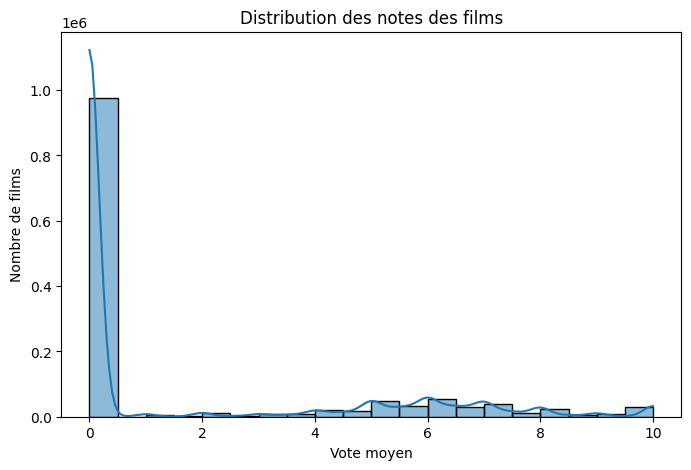

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title("Distribution des notes des films")
plt.xlabel("Vote moyen")
plt.ylabel("Nombre de films")
plt.show()


b) Distribution du nombre de votes (vote_count)

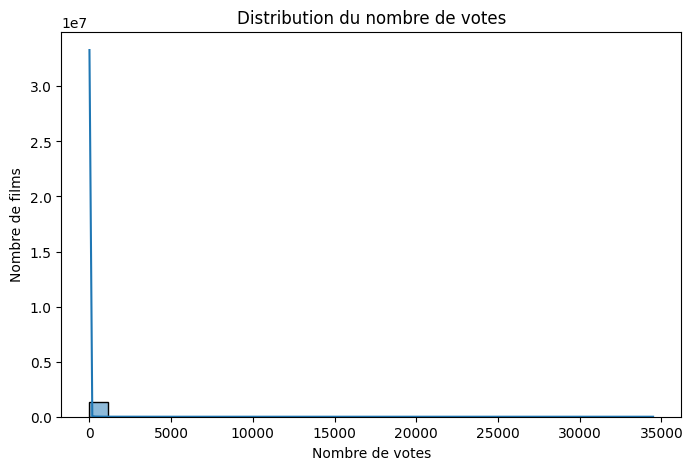

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['vote_count'], bins=30, kde=True)
plt.title("Distribution du nombre de votes")
plt.xlabel("Nombre de votes")
plt.ylabel("Nombre de films")
plt.show()


c) Films par genre

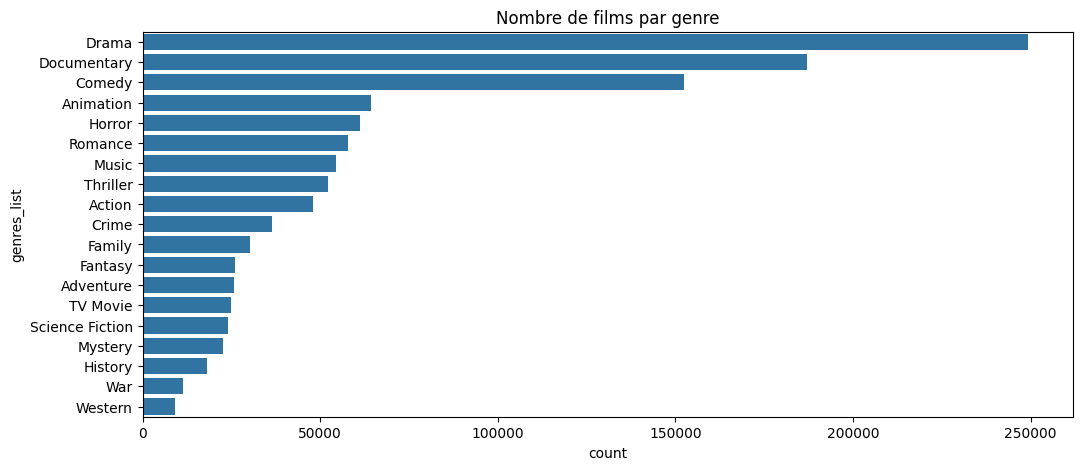

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraire les genres
df['genres_list'] = df['genres'].str.split(', ')
all_genres = df['genres_list'].explode().reset_index(drop=True)

plt.figure(figsize=(12,5))
sns.countplot(y=all_genres, order=all_genres.value_counts().index)
plt.title("Nombre de films par genre")
plt.show()


d) Films par année de sortie

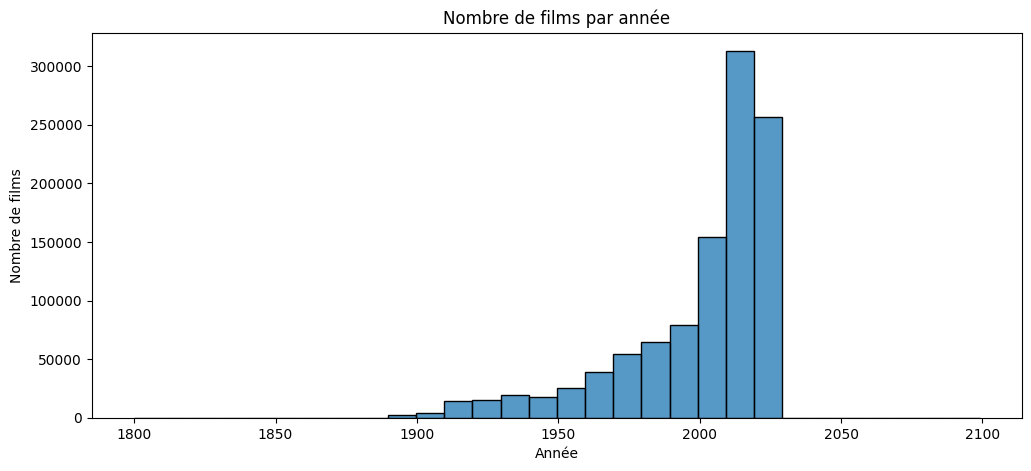

In [6]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
plt.figure(figsize=(12,5))
sns.histplot(df['release_year'].dropna(), bins=30)
plt.title("Nombre de films par année")
plt.xlabel("Année")
plt.ylabel("Nombre de films")
plt.show()


e) Top 10 des films les mieux notés

In [7]:
top_movies = df[['title','vote_average','vote_count']].sort_values(by=['vote_average','vote_count'], ascending=False).head(10)
print(top_movies)


                                                   title  vote_average  \
29146  What's New Scooby-Doo? Vol. 4: Merry Scary Hol...          10.0   
29209     What's New, Scooby-Doo? Vol. 7: Ready to Scare          10.0   
31957  The 1st 13th Annual Fancy Anvil Awards Show Pr...          10.0   
39055                    Scooby-Doo's Original Mysteries          10.0   
44386  Scooby-Doo: Agence toutou risques, vol. 1 : Le...          10.0   
44387  Scooby-Doo: Agence toutou risques, vol. 2 : Le...          10.0   
66751                                   The Devil's Hour          10.0   
68258                                   Наркоза не будет          10.0   
71385                                     The Experiment          10.0   
71888                    South Park: The Chef Experience          10.0   

       vote_count  
29146          46  
29209          46  
31957          40  
39055          29  
44386          24  
44387          24  
66751          12  
68258          12  
71385

4️⃣ Statistiques rapides

In [8]:
print("Nombre total de films:", len(df))
print("Années min/max:", df['release_year'].min(), df['release_year'].max())
print("Nombre de genres uniques:", all_genres.nunique())
print("Genres les plus fréquents:\n", all_genres.value_counts().head(10))


Nombre total de films: 1330511
Années min/max: 1800.0 2099.0
Nombre de genres uniques: 19
Genres les plus fréquents:
 genres_list
Drama          249358
Documentary    187198
Comedy         152551
Animation       64450
Horror          61221
Romance         57937
Music           54441
Thriller        52194
Action          48062
Crime           36465
Name: count, dtype: int64
